# Wine Quality
**Programmazione di Applicazioni Data Intensive 2019/20**
- Scopo: generare modelli di classificazione in grado di prevedere la qualità del vino bianco
<br><br>
- Laurea in Ingegneria e Scienze Informatiche
<br><br>
- Studente: Bazzocchi Luca
- Mail: luca.bazzocchi2@studio.unibo.it

## Setup

- Importazione delle librerie necessarie per lo studio dei dati

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

- Si utilizza *filterwarnings* per non avere warnings sulle massime iterazioni raggiunte dai modelli

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Il Vino Bianco

- Il vino bianco è un prodotto ottenuto dalla fermentazione alcolica del mosto di uva a bacca bianca o di uva a bacca nera con polpa incolore. Durante il processo di vinificazione viene sottoposto a dei trattamenti specifici per mantenere inalterata la colorazione gialla trasparente che lo contraddistingue.

## Analisi generale del problema

- Per definire in maniera corretta un vino si devono considerare tanti fattori che ne influenzano la qualità:
  - la posizione geografica e il clima,
  - la giacitura che indica le caratteristiche del terreno in cui la vite cresce,
  - l'annata.
- Il set di dati preso in considerazione riguarda la produzione del "Vinho Verde".
  - Il Vinho Verde è un prodotto unico della regione del Minho (nord-ovest) in Portogallo. Esso presenta una media gradazione alcolica ed è particolarmente apprezzato per la sua freschezza. Maggiori dettagli sul sito di [produzione](https://www.vinhoverde.pt/en/).
- Questo dataset è disponibile al pubblico a solo scopo di ricerca, per ulteriori informazioni, leggere [Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine5.pdf).
- A causa di problemi di privacy e logistica, sono disponibili solo variabili fisico-chimiche (input) e sensoriali (output) (ad esempio non ci sono dati su tipi di uva, marchio del vino, prezzo di vendita del vino, ecc.).
- L'obiettivo è generare modelli di classificazione in grado di prevedere la qualità del vino bianco in base alle 11 variabili presenti nel dataset
    - Il voto che è stato dato da 0 a 10 verrà diviso in due classi: low (da 0 a 6) e high (da 7 a 10)

## Estrazione dati
- I dati utilizzati sono stati presi da UCI (https://archive.ics.uci.edu/ml).
- Dal sito è possibile interattivamente cercare e consultare dataset forniti al pubblico per studio e ricerca sul Machine Learning e Sistemi Intelligenti.
- Il dataset preso in considerazione è presente all'URL https://archive.ics.uci.edu/ml/datasets/Wine+Quality.
    - Si è scelto di studiare solamente i valori riguardanti il vino bianco e non anche quello rosso per non avere troppe limitazioni vista la scarsità dei dati rispetto al bianco (1600 righe il rosso, 4900 il bianco) 

In [3]:
import os.path
if not os.path.exists("winequality-white.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", "winequality-white.csv")

- Il file è già adattato per essere caricato con `read_csv` scegliendo come separatore il `;`

In [4]:
wine = pd.read_csv("winequality-white.csv", sep=';')

## Lista delle variabili
- Il set di dati presenta 12 variabili, di cui undici fisico-chimiche (input) e una sensoriale (output):
- **fixed acidity**: l’acidità dovuta a tutti gli acidi che non si disperdono durante la vita di un vino.
- **volatile acidity**: indica l'insieme degli acidi volatili presenti nel vino (ac.acetico per la quasi totalità); in minima quantità esalta l'insieme delle sensazioni olfattive (profumi) di un vino, in eccesso può portare a un sapore sgradevole e simile all'aceto.
- **citric acid**: viene utilizzato nel vino per prevenire le ossidazioni; trovato in piccole quantità, l'acido citrico può aggiungere "freschezza" e sapore ai vini.
- **residual sugar**: la quantità di zucchero rimasta dopo la fine della fermentazione e che quindi non ha subito la fermentazione alcolica. E' raro trovare vini con meno di 1 grammo / litro e, i vini con più di 45 grammi / litro, sono considerati dolci.
- **chlorides**: la quantità di sale nel vino.
- **free sulfur dioxide**: l'anidride solforosa $SO_{2}$ viene aggiunta al mosto o al vino durante i processi di vinificazione. Questo composto, infatti, presenta proprietà antiossidanti, antisettiche e solubilizzanti (facilita l'estrazione delle sostanze coloranti dalla buccia degli acini). In particolare l'anidride solforosa, detta libera, si trova sotto forma di gas o allo stato di combinazioni inorganiche ($H_{2}$$SO_{3}$, $HSO_{3}$$^{-}$ e $SO_{3}$$^{2-}$). Solo questa parte è in grado di svolgere l'azione antisettica.
- **total sulfur dioxide**: la somma dell'anidride solforosa libera e dell’anidride solforosa combinata costituisce l’anidride solforosa totale.
- **density**: densità del vino rispetto a quella dell'acqua. Dipende dalla percentuale dell'alcool e zucchero contenuto.
- **pH**: descrive quanto un vino sia acido o basico su una scala da 0 (molto acido) a 14 (molto basico); la maggior parte dei vini si trova tra 3 e 4 sulla scala del pH.
- **sulfites**: i solfiti sono molecole formate dall’unione del solfito (ione negativo composto da zolfo e ossigeno) con altri atomi. Presentano proprietà antimicrobiche e antiossidanti, riuscendo a conservare le qualità originali del vino salvaguardandolo dal proliferare di batteri potenzialmente dannosi.
- **alcohol**: la percentuale alcolica del vino.
- ***quality*: punteggio dato al vino tra 0 e 10 basato basato su dati sensoriali.**
  - si vuole stimare il valore di questa variabile in funzione delle altre

Per prima cosa si visualizza il dataframe per avere un'idea sui dati

In [5]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

- Capita la struttura dei dati, si controlla il numero di righe del dataset per vedere se è sufficientemente grande

In [6]:
len(wine.index)

4898

- Si tratta di un numero discreto di valori
- Ora bisogna controllare la mancanza o meno di dati all'interno del dataframe, e nel caso, aggiungerli o rimuovere le righe corrispondenti

In [7]:
wine.count() == len(wine.index)

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

- Non ci sono valori mancanti, si procede con l'analisi eplorativa

## Analisi Esplorativa

- Ora si osservano le statistiche principali (media, dev. standard, ...) delle varie colonne

In [8]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

- Si può notare un certo scostamento tra i valori delle variabili, sarà probabilmente utile utilizzare regressioni con standardizzazione delle feature
- La densità è la caratteristica che presenta meno variabilità tra le 11 in studio, essa potrebbe essere scarsamente utile nel prevedere la qualità del vino, mentre l'anidride solforosa totale è quella che varia di più

- Visto il grande numero delle variabili si osserverà nel dettaglio solamente un numero ristretto di grafici
  - verranno prese per prime l'acidità fissa e l'acidità volatile e messe in un grafico a dispersione (scatter plot)

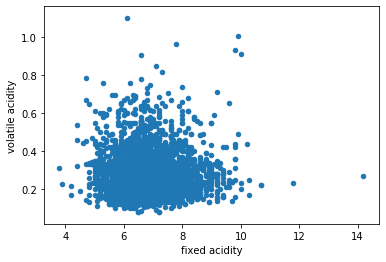

In [9]:
wine.plot.scatter("fixed acidity", "volatile acidity");

- Il grafico a dispersione presenta dei dati abbastanza sparsi e senza un andamento specifico, ciò suggerisce una poca correlazione tra le due variabili

## Correlazione tra Variabili

- Per misurare la correlazione si può utilizzare il *coefficiente di correlazione di Pearson*: indice usato per valutare numericamente il grado di correlazione tra due variabili X e Y.
- Il suo valore è compreso tra -1 e 1:
  - valori vicini a 1 indicano correlazione diretta (Y cresce al crescere di X)
  - valori vicini a -1 indicano correlazione inversa (Y descresce al crescere di X)
  - valori vicini a 0 indicano assenza di correlazione
- Come visto a lezione, data una serie di campioni $(x_1,y_1),\ldots,(x_n,y_n)$ delle due variabili con medie $\mu_X$ e $\mu_Y$, la correlazione si può stimare come
$$ \frac{\sum_{i=1}^n{(x_i-\mu_X)\cdot(y_i-\mu_Y)}}{n\cdot\sigma_X\cdot\sigma_Y} $$

- Viene definita la funzione vista sopra, che restituisca la correlazione di due serie val_1 e val_2

In [10]:
def correlation(val_1, val_2):
    return np.mean((val_1 - val_1.mean()) * (val_2 - val_2.mean())) / (val_1.std() * val_2.std())

- Ora si calcola la correlazione in base alle due feature *fixed acidity* e *volatile acidity* del grafico a dispersione

In [11]:
correlation(wine["fixed acidity"].values, wine["volatile acidity"].values)

-0.022697290146647137

- Essendo il valore, molto vicino allo 0, le due feature hanno una totale assenza di correlazione tra loro; proprio come era stato presupposto osservando il grafico.

- Dato l'alto numero di feature, osservare ogni grafico e poi calcolarne la correlazione ad uno ad uno non sarebbe la scelta ottimale.
- Viene perciò definita una nuova funzione che, dato un dataframe, ci calcoli tutte le possibili correlazioni tra le diverse colonne (non contando i duplicati) mettendole all'interno di un dizionario:

In [12]:
def correlation_values(data_frame):
    corr_values = {}
    for index, name in enumerate(data_frame):
        for index_2, name_2 in enumerate(data_frame):
            if index_2 > index:
                val_1 = data_frame[name].values
                val_2 = data_frame[name_2].values
                corr_values[(name, name_2)] = correlation(val_1, val_2)
    return corr_values

In [13]:
corr_dic = correlation_values(wine)

- I valori ottenuti vengono inseriti all'interno di un DataFrame per facilitare l'osservazione dei valori ottenuti

In [14]:
corr_df = pd.DataFrame.from_dict(corr_dic, orient='index', columns=['values'])

In [15]:
corr_df

values
(fixed acidity, volatile acidity)    -0.022697
(fixed acidity, citric acid)          0.289181
(fixed acidity, residual sugar)       0.089021
(fixed acidity, chlorides)            0.023086
(fixed acidity, free sulfur dioxide) -0.049396
...                                        ...
(pH, alcohol)                         0.121432
(pH, quality)                         0.099427
(sulphates, alcohol)                 -0.017433
(sulphates, quality)                  0.053678
(alcohol, quality)                    0.435575

[66 rows x 1 columns]

- Sono presenti in totale 66 diversi valori, di questi si studiano quelli più significativi

In [16]:
corr_df.loc[(corr_df['values'] >= 0.5) | (corr_df['values'] <= -0.5)]

values
(residual sugar, density)                    0.838966
(free sulfur dioxide, total sulfur dioxide)  0.615501
(total sulfur dioxide, density)              0.529881
(density, alcohol)                          -0.780138

- Come si può notare, la *densità* è la variabile con più correlazioni
- Quando sarà il momento di selezionare le feature più rilevanti, questa sarà probabilmente eliminata
- Si decide di prendere il valore più alto come primo caso da osservare in un grafico

In [17]:
corr_df["values"].idxmax()

('residual sugar', 'density')

In [18]:
corr_df["values"].max()

0.8389664549045835

- *residual sugar* e *density* sono le due feature che presentano la maggior correlazione diretta, infatti la densità dipende dalla quantità di zucchero e alcool contenuta nel vino
- Queste vengono visualizzate all'interno di un grafico a dispersione

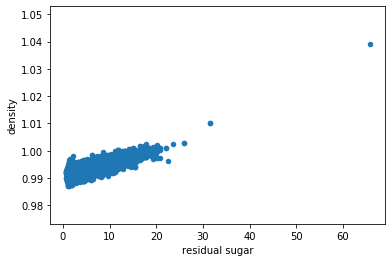

In [19]:
wine.plot.scatter('residual sugar', 'density');

- Visto il grafico con le feature con maggiore correlazione diretta, ora si controllano le feature con una correlazione inversa abbastanza alta

In [20]:
corr_df["values"].idxmin()

('density', 'alcohol')

In [21]:
corr_df["values"].min()

-0.7801376214255576

- *density* e *alcohol* presentano una discreta correlazione inversa, si decide di vedere il grafico anche di queste

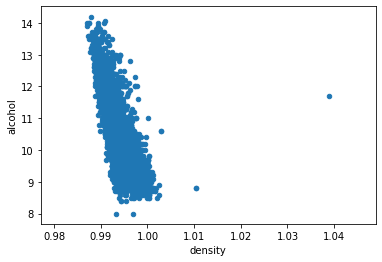

In [22]:
wine.plot.scatter('density', 'alcohol');

- Mentre il grafico di *residual sugar* e *density* presentava un andamento lineare con coefficiente angolare positivo (y=ax+b), questo ne presenta uno con coefficiente angolare negativo, sottolineando la correlazione inversa tra le due variabili

## Caso di studio: Qualità del Vino

- Si vogliono suddividere i diversi punteggi da 0 a 10 della qualità del vino in 2 classi:
    - low (da 0 fino a 6)
    - high (da 7 fino a 10)
- In base a questa classificazione verranno implementati algoritmi per la previsione della qualità

- Si modificano i valori del DataFrame per avere la suddivisione in classi

In [23]:
wine["quality"] = wine.quality.apply(lambda q: 'low' if q <= 6 else 'high')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol quality  
0      8.8     low  
1      9.5     low  
2     10.1     low  
3      9.9     low  
4      9.9     low

- Ottenuto il DataFrame con le due classi *low* e *high*, utilizzare il metodo `value_counts` su ciascuna per analizzarne la distribuzione dei valori 

In [24]:
wine["quality"].value_counts()

low     3838
high    1060
Name: quality, dtype: int64

- Il numero di istanze della classe *low* è molto maggiore rispetto alle altre.
- Ci viene anche mostrato che i vini di alta qualità presi in esame sono pochi.
- Specificando `normalize=True` vengono ottenute le frequenze relative (in x100 rappresentano le percentuali sul totale)

In [25]:
wine["quality"].value_counts(normalize=True)

low     0.783585
high    0.216415
Name: quality, dtype: float64

- Poco meno del 22% dei vini del dataset sono di buona qualità (punteggio tra 7 e 10)

## Grafici
- Si vuole visualizzare la distribuzione dei valori categorici ottenuti con `value_counts`.
- Il metodo `plot.pie` crea un grafico a torta usando valori ed etichette della serie estratta

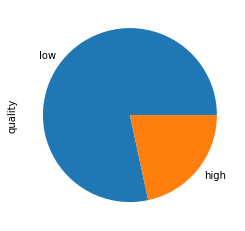

In [26]:
wine["quality"].value_counts().plot.pie();

- Invece, il metodo `plot.bar`, crea un grafico a barre con cui poter vedere da un'altro punto di vista le diverse distribuzione di valori di `quality`

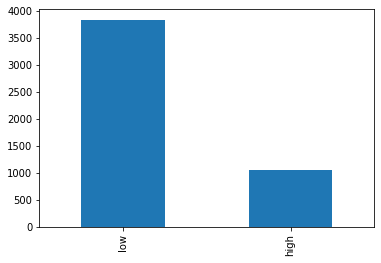

In [27]:
wine["quality"].value_counts().plot.bar();

- Essendo l'*anidride solforosa totale* una feature con valori molto diversificati, può essere un importante oggetto di studio con il metodo `describe`

In [28]:
wine["total sulfur dioxide"].describe()

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

- Quasi tutti i valori si concentrano tra 108 e 167 (tra il 25° e il 75° percentile) però c'è un valore massimo di 440 e uno minimo a 9.
- Questi due valori sono molto fuori scala rispetto a quelli medi
- Un *box plot* visualizza le statistiche di base di una o più serie di dati (le informazioni fornite dal metodo `describe`)
- Si utilizza il metodo `plot.box` per osservare tramite un grafico i valori dell'*anidride solforosa totale*

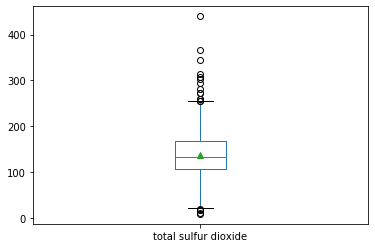

In [29]:
wine["total sulfur dioxide"].plot.box(showmeans=True);

- Sono molti i valori oltre e prima il 25° e il 75° percentile, la feature potrebbe non essere significativa
<br><br>
- In un problema di classificazione, è utile visualizzare quanto le variabili predittive siano correlate con la classe da predire
- Viene qui sotto visualizzato un'istogramma *stacked* di `alcohol`, in cui in ogni intervallo si vede la suddivisione dei valori tra le due classi

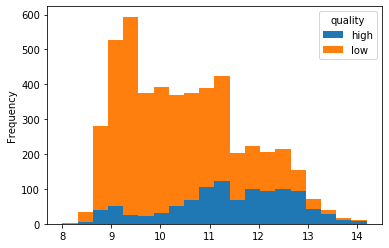

In [30]:
wine.pivot(columns="quality")["alcohol"].plot.hist(bins=20, stacked=True);

- I vini con un grado più elevato di alcool hanno più possibilità di essere di elevata qualità rispetto a quelli con un grado più basso

### Ripresa delle correlazioni precedenti
- Durante lo studio delle correlazioni tra feature, sono stati presi tre diversi grafici a dispersione:
    - *fixed acidity* e *volatile acidity*,
    - *residual sugar* e *density*,
    - *density* e *alcohol*.
- Ora, in questi tre grafici, verranno evidenziate le classi differenziando i punti per colore

In [31]:
wine_color_map = {"low": "orange", "high": "green"}

In [32]:
wine_colors = wine["quality"].map(wine_color_map)

- La serie di valori "orange", "green" e "red" viene utilizzata per assegnare un colore differenziato ai punti dei grafici a dispersione

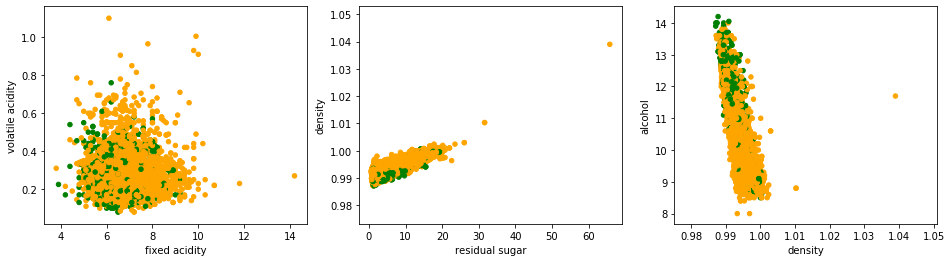

In [33]:
plt.figure(figsize=(16, 4))
for n, col in enumerate([["fixed acidity", "volatile acidity"],["residual sugar", "density"],
                                ["density", "alcohol"]], start=1):
    wine.plot.scatter(col[0], col[1], c=wine_colors, ax=plt.subplot(1, 3, n));

- Mentre nel primo grafico le due classi sono più sparpagliate, nel secondo e nel terzo tendono ad accumularsi in punti specifici

## Classificazione

- Un classificatore a due classi *lineare* è definito da un **iperpiano** che separa lo spazio delle variabili in due *semispazi*
- Un modello di classificazione lineare a $n$ variabili $x_1,\ldots,x_n$ consiste in generale nell'individuare un iperpiano di classificazione descritto dall'equazione:
$$ w_1\cdot x_1+\ldots+w_n\cdot x_n+b = 0 $$ In forma vettoriale: $$ \mathbf{w}\cdot\mathbf{x}+b = 0 $$

- Come test iniziale si utilizza un insieme ristretto di dati: vengono scelte due variabili (*alcohol* e *volatile acidity*) così da poterle anche visualizzare in un grafico e, tramite una classificazione lineare, si cercherà di predire la qualità dei vini

In [34]:
y = wine["quality"]
X = wine[["alcohol", "volatile acidity"]]

- Per quanto riguarda la suddivisione dei dati in train e test, viene utilizzata la funzione `train_test_split` con una ripartizione 2/3 - 1/3 rispettivamente

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=57)

- Per addestrare un modello di regressione logistica, si crea un oggetto `LogisticRegression` che incapsulerà **un iperpiano per distinguere ciascuna classe**

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10, solver="saga", random_state=57)

In [38]:
model.fit(X_train, y_train);

In [39]:
model.score(X_val, y_val)

0.7905695039804042

- Per una semplice regressione logistica il risultato è buono, però è stato fatto su un numero limitato di variabili rispetto a quelle totali e forse non sono stati colti alcuni problemi
- Si estraggono allora i coefficienti e le intercette degli iperpiani individuati dall'algoritmo

In [40]:
model.coef_

array([[-0.86026404,  2.92287101]])

In [41]:
model.intercept_

array([9.81715012])

- Vengono ripresi due metodi visti a lezione per visualizzare in un grafico i dati e gli iperpiani

In [42]:
def separator_2d(model, x1, n=0):
    return -x1*model.coef_[n, 0]/model.coef_[n, 1] -model.intercept_[n]/model.coef_[n, 1]

In [43]:
def plot_separator_on_data(X, y, color_map, model=None):
    X = np.array(X)
    colors = pd.Series(y).map(color_map)
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(model, sep_x)
        plt.plot(sep_x, sep_y, c="green", linewidth=2)
        plt.xlim(xlim); plt.ylim(ylim)

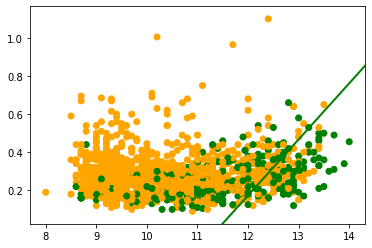

In [44]:
plot_separator_on_data(X_val, y_val, wine_color_map, model)

- Sembra che l'algoritmo privilegi la classe più numerosa rispetto all'altra
- Per esserne sicuri, viene utilizzata una ***matrice di confusione***
- Ogni cella in riga i e colonna j indica quanti esempi della classe i-esima sono stati etichettati dal classificatore come di classe j-esima
  - lungo la diagonale (i=j) vi sono le quantità di classificazioni corrette, al di fuori, invece, le quantità di errori

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

high   low
high    78   274
low     68  1213

- L'algoritmo da poco peso alla classe high avendo un numero nettamente inferiore di istanze rispetto alle altre all'altra classe
- Presa in esame la matrice di confusione si vogliono ricavare alcuni valori, tra cui l'accuratezza del modello calcolata prima:

In [47]:
cm.diagonal().sum() / cm.sum()

0.7905695039804042

- Precision e recall sono due indicatori complementari della bontà di un modello:
    - La **_precision_** indica la percentuale di esempi classificati come una certa classe che sono realmente tali
    - La **_recall_**, invece, indica la percentuale di esempi realmente di una classe che sono stati rilevati essere tali dal modello
- Come misura unica della performance di un modello è spesso usata la **_F1-measure_**, ovvero la media armonica tra precision e recall
$$ F_1 = \frac{2\cdot P\cdot R}{P+R} $$

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

- Vengono calcolate *precision*, *recall* e *f1-measure* per le classi

In [49]:
precision_score(y_val, y_pred, average=None)

array([0.53424658, 0.81573638])

In [50]:
recall_score(y_val, y_pred, average=None)

array([0.22159091, 0.94691647])

In [51]:
f1_score(y_val, y_pred, average=None)

array([0.31325301, 0.87644509])

- La classe `high` pur avendo una precision superiore al 50%, la recall è molto bassa
- Ciò è dovuto dal ridotto numero di istanze della classe rispetto a `low`, si ha perciò un problema con **classi sbilanciate**

## Risoluzione Classi Sbilanciate

- Come visto dalla *matrice di confusione* e dagli indicatori della bontà del modello, quando si hanno delle classi con poche istanze e altre con molte, il modello tende a preferire le classi maggioritarie prevedendo solamente valori di quel tipo
- Per lo studio verranno utilizzati 3 diversi metodi:
    - **over_sampling**: si tratta di aumentare il numero di istanze della classe minoritaria per raggiungere quella maggiore
    - **under_sampling**: vengono ridotte le istanze della classe maggiore per farle combaciare con quella minore
    - *combinazione di over e under sampling* per ottenere delle istanze più equilibrate

- `imbalanced-learn` contiene i metodi per l'under e over sampling, perciò viene installata

In [52]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\luca\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [53]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#### Synthetic Minority Oversampling TEchnique (*SMOTE*):
- SMOTE seleziona prima un'istanza della classe di minoranza a caso (A) e trova i suoi k vicini. SMOTE genera osservazioni "sintetiche" scegliendo casualmente uno dei k vicini (B) per poi collegare A e B e formare un segmento nello spazio delle caratteristiche. Le osservazioni sintetiche sono generate come una combinazione convessa delle due istanze scelte A e B.
- In altre parole, per creare un’osservazione artificiale si sceglie in maniera casuale uno dei K vicini, e dopo si perturba l’osservazione con una porzione casuale della differenza tra la stessa osservazione e un’estratta a caso tra i vicini più vicini

In [54]:
y_train.value_counts()

low     2557
high     708
Name: quality, dtype: int64

- Viene utilizzato *SMOTE* per portare il numero di istanze di high da 708 a 2557

In [55]:
over = SMOTE(random_state=57)
X_over, y_over = over.fit_resample(X_train, y_train)

In [56]:
y_over.value_counts()

low     2557
high    2557
Name: quality, dtype: int64

- Grafico prima dell'aggiunta

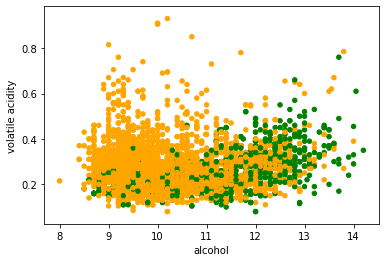

In [57]:
wine_colors = y_train.map(wine_color_map)
X_train.plot.scatter(X_train.columns[0], X_train.columns[1], c=wine_colors);

- Grafico dopo l'utilizzo di SMOTE

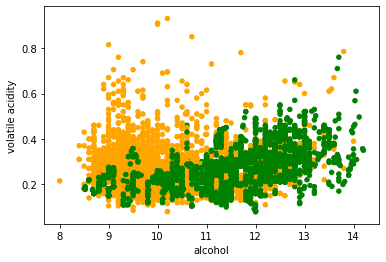

In [58]:
wine_colors = y_over.map(wine_color_map)
X_over.plot.scatter(X_over.columns[0], X_over.columns[1], c=wine_colors);

- Con i nuovi dati si addestra lo stesso tipo di modello utilizzato precedentemente per vedere le differenze

In [59]:
model = LogisticRegression(C=10, solver="saga", random_state=57)
model.fit(X_over,y_over)
model.score(X_val, y_val)

0.7036129822412738

- L'accuratezza è diminuita del 9%, era prevedibile vista l'aggiunta di valori artificiali
- Si definisce una funzione per ottenere una matrice di confusione dai dati e il modello e se ne osserva il comportamento

In [60]:
def get_confusion_matrix(X_val, y_val, model):
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    return pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

In [61]:
get_confusion_matrix(X_val, y_val, model)

high  low
high   256   96
low    388  893

- Il modello, rispetto al set di dati precedente, ha cercato di classificare molte più volte il valore *high*
- Vediamo ora *precision*, *recall* e *f1 measure*

In [62]:
y_pred = model.predict(X_val)

In [63]:
(precision_score(y_val, y_pred, average=None))

array([0.39751553, 0.90293225])

In [64]:
recall_score(y_val, y_pred, average=None)

array([0.72727273, 0.69711163])

In [65]:
f1_score(y_val, y_pred, average=None)

array([0.51405622, 0.78678414])

- La *precision* è calata mentre la *recall* per la classe `high` è migliorata moltissimo, portando così ad un *F1-measure* migliore, pur peggiorando in generale la classe `low`

#### RandomUnderSampler:
- Bilancia i dati in ingresso selezionando casualmente un sottoinsieme per le classi richieste
- E' una tecnica molto semplice e veloce
- Vogliamo pareggiare i dati della classe *low* con quelli della *high*

In [66]:
high_num = (y_train == "high").sum()
instances = {"low": high_num, "high": high_num}

In [67]:
under = RandomUnderSampler(sampling_strategy=instances, random_state=57)

- Si utilizza il metodo `fit_resample` come in *SMOTE* per selezionare i dati

In [68]:
X_under, y_under = under.fit_resample(X_train, y_train)

In [69]:
y_under.value_counts()

high    708
low     708
Name: quality, dtype: int64

- Visualizziamo i dati in un grafico a dispersione

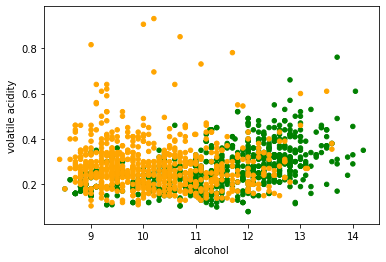

In [70]:
wine_colors = y_under.map(wine_color_map)
X_under.plot.scatter(X_under.columns[0], X_under.columns[1], c=wine_colors);

- Con i nuovi dati si addestra lo stesso tipo di modello per vedere le differenze tra under e over sampling

In [71]:
model = LogisticRegression(C=10, solver="saga", random_state=57)
model.fit(X_under, y_under)
model.score(X_val, y_val)

0.7011635027556644

- L'accuratezza è leggermente inferiore rispetto all'*over sampling*

In [72]:
get_confusion_matrix(X_val, y_val, model)

high  low
high   256   96
low    392  889

- Per non allungarci troppo vediamo le performance del modello solamente attaverso la *F1-measure*

In [73]:
f1_score(y_val, model.predict(X_val), average=None)

array([0.512     , 0.78464254])

- Per queste specifiche feature, l'utilizzo di under e over sampling è pressoché identico
- Prima di passare a modelli più complessi con l'intero dataset, si vuole utilizzare una combinazione delle due tecniche

In [74]:
def SMOTE_under_sampling(X, y, num_inst):
    over = SMOTE(random_state=57)
    X_over, y_over = over.fit_resample(X, y)
    instances = {"low": num_inst, "high": num_inst}
    under = RandomUnderSampler(sampling_strategy=instances, random_state=57)
    return under.fit_resample(X_over, y_over)

In [75]:
X_under, y_under = SMOTE_under_sampling(X_train, y_train, 1000)

In [76]:
y_under.value_counts()

high    1000
low     1000
Name: quality, dtype: int64

- Si è passati prima a 2557 righe con *SMOTE* e poi a 1000 con *RandomUnderSampler* con entrambe le classi

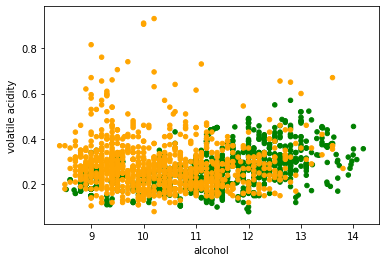

In [77]:
wine_colors = y_under.map(wine_color_map)
X_under.plot.scatter(X_under.columns[0], X_under.columns[1], c=wine_colors);

In [78]:
model = LogisticRegression(C=10, solver="saga", random_state=57)
model.fit(X_under, y_under)
model.score(X_val, y_val)

0.7066748315982854

In [79]:
get_confusion_matrix(X_val, y_val, model)

high  low
high   254   98
low    381  900

In [80]:
f1_score(y_val, model.predict(X_val), average=None)

array([0.51469098, 0.7898201 ])

- I valori possono variare molto a seconda del numero di istanze aggiunte o rimosse
- Nel nostro caso e per i valori scelti, l'utilizzo delle tre tecniche non ha portato grandi cambiamenti
- Per i prossimi modelli si utilizzerà una combinazione tra over e under sampling

## Normalizzazione / Standardizzazione delle Feature
- Nella normalizzazione, i dati vengono ridimensionati su un intervallo fisso, da 0 a 1
- Essa è una buona tecnica da usare quando non si conosce la distribuzione dei dati
- La normalizzazione di una variabile è data dalla seguente formula:
$$ Z = \frac{X-min(X)}{max(X)-min(X)} $$

- Verrà creata una funzione che dato un DataFrame, mi restituisca il DataFrame normalizzato

In [81]:
def normalization(df):
    return (df - df.min()) / (df.max() - df.min())

- Ora si procede alla normalizzazione del dataset originale

In [82]:
X = wine.drop(columns="quality")
y = wine["quality"]
wine_norm = normalization(X)

In [83]:
wine_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  
0  0.129032  
1  0.241935  
2  0.338710  
3  0.306452  
4  0.306452

- Verranno creati 3 modelli che utilizzano la normalizzazione, la standardizzazione e nessuna delle due rispettivamente
- Questi modelli saranno poi confrontati tra loro

In [84]:
X_train, X_val, y_train, y_val = train_test_split(wine_norm, y, test_size=1/3, random_state=57)

In [85]:
model = LogisticRegression(solver="saga", random_state=57)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8022045315370484

In [86]:
get_confusion_matrix(X_val, y_val, model)

high   low
high    85   267
low     56  1225

In [87]:
f1_score(y_val, model.predict(X_val), average=None)

array([0.34482759, 0.88351965])

- La normalizzazione ha prodotto un buon risultato però, come si può notare dalla *matrice di confusione* e dall'*F1-measure*, il modello tende a preferire la classe più numerosa
- In questo caso come anche nei prossimi due, per semplicità, non sono state usate le tecniche di under e over sampling; verranno poi riutilizzate con lo studio dei vari modelli
- La normalizzazione può essere effettuata anche importando `MinMaxScaler` che utilizza la stessa funzione che è stata creata precedentemente

In [88]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X.values)
pd.DataFrame(x_scaled, columns=X.columns).head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  
0  0.129032  
1  0.241935  
2  0.338710  
3  0.306452  
4  0.306452

- Questo dataset normalizzato è identico a all'altro

### Standardizzazione
- La standardizzazione dei dati è il processo di ridimensionamento di uno o più attributi in modo che abbiano un valore medio di 0 e una deviazione standard di 1. 
- Data una variabile $X$ con media $\mu$ e deviazione standard $\sigma$, la sua versione "standard" è calcolata come
$$ Z = \frac{X-\mu}{\sigma} $$

- Per la standardizzazione dei dati verrà utilizzato `StandardScaler` all'interno di una `Pipeline`

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=57)

In [91]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=57))
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.7973055725658298

In [92]:
get_confusion_matrix(X_val, y_val, model)

high   low
high   101   251
low     80  1201

In [93]:
f1_score(y_val, model.predict(X_val), average=None)

array([0.37898687, 0.87888767])

- L'accuratezza è lievemente inferiore all'utilizzo della normalizzazione, ma la F1-measure è migliorata
- Anche in questo caso servirebbero sui dati tecniche di under e over sampling

- Infine si utilizza un modello senza modificazioni sui dati originali

In [94]:
model = LogisticRegression(solver="saga", random_state=57)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.7819963257807716

In [95]:
get_confusion_matrix(X_val, y_val, model)

high   low
high     2   350
low      6  1275

In [96]:
f1_score(y_val, model.predict(X_val), average=None)

array([0.01111111, 0.87749484])

- Senza alcun intervento sui dati abbiamo ricevuto un F1-measure con risultati inaccettabili, il modello ha scelto di predire semplicemente la classe più numerosa

- Oltre alle tecniche di normalizzazione e standardizzazione delle feature ve ne sono altre, tra cui la binarizzazione (i dati vengono convertiti in 0 o 1 in base ad una soglia / threshold) e la discretizzazione (decompone ogni caratteristica in un insieme di contenitori / bin, equamente distribuiti in larghezza)

## Selezione delle Feature

- Come prima cosa si vogliono addestrare tre modelli: Perceptron, LogisticRegression e StandardScaler per studiare i coefficienti associati a ciascuna variabile

In [97]:
from sklearn.linear_model import Perceptron

In [98]:
per = Pipeline([
    ("scale", StandardScaler()),
    ("per",  Perceptron(n_jobs=-1, random_state=57))
])
per.fit(X_train, y_train);

log = LogisticRegression(solver="saga", random_state=57)
log.fit(X_train, y_train);

scaled = Pipeline([
    ("scale", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=57))
])  
scaled.fit(X_train, y_train);

In [99]:
pd.DataFrame(
    {"perc scaled": per.named_steps["per"].coef_[0], 
     "logreg": log.coef_[0], 
     "log scaled": scaled.named_steps["logreg"].coef_[0]
    }, X_train.columns)

perc scaled    logreg  log scaled
fixed acidity           -0.114946  0.127504   -0.484900
volatile acidity         3.007408  0.006468    0.351793
citric acid              2.776061  0.007770    0.124269
residual sugar          -6.378877  0.021529   -1.479058
chlorides                2.074341  0.003521    0.294047
free sulfur dioxide      0.014210 -0.016926   -0.093126
total sulfur dioxide    -1.504726  0.014930   -0.100188
density                  9.027693  0.017103    1.856883
pH                      -3.010748  0.045034   -0.445531
sulphates               -2.337819  0.000046   -0.273527
alcohol                 -2.073297 -0.123699   -0.297133

In [100]:
scaled.named_steps["logreg"].classes_

array(['high', 'low'], dtype=object)

- Da come sono state ordinate le classi capiamo che i valori positivi indicano una diminuzione della qualità e, per i valori negativi, un aumento
- Perciò dai coefficienti ottenuti, si osserva che all'aumentare della `volatile acidity` e `chlorides`, diminuisce anche la qualità
- Con `residual sugar` o `alcohol` invece aumenta
    - I vini bianchi e dolci in generale sono considerati migliori

- Non sempre tutte le caratteristiche prese in esame sono veramente utili per la predizione delle classi
- Si decide di addestrare un modello di regressione logistica con standardizzazione dei dati e regolarizzazione L1 con C=0.02 stampando i pesi del modello etichettati con i nomi delle colonne
  - verificando così quali delle 11 colonne risultano significative
- I dati utilizzati verranno prima ribilanciati attraverso la funzione `SMOTE_under_sampling` creata prima

In [101]:
X_under, y_under = SMOTE_under_sampling(X_train, y_train, 1500)

In [102]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("logreg", LogisticRegression(solver="saga", random_state=57, penalty="l1", C=0.02))
])  
model.fit(X_under, y_under)
pd.Series(model.named_steps["logreg"].coef_[0], index = X_under.columns)

fixed acidity           0.000000
volatile acidity        0.278337
citric acid             0.011712
residual sugar         -0.191305
chlorides               0.103818
free sulfur dioxide    -0.062792
total sulfur dioxide    0.000000
density                 0.000000
pH                     -0.047211
sulphates              -0.125842
alcohol                -1.094454
dtype: float64

- Attraverso l'addestramento del modello e una regolarizzazione abbastanza forte, abbiamo trovato 3 feature poco significative:
    - ***fixed acidity***: sembra che l'acidità degli acidi che non si disperdono durante la vita di un vino sia poco importante rispetto a quelli che si liberano (volatile acidity)
    - ***total sulfur dioxide***: l'anidride solforosa totale presenta una grande variabilità tra i valori, questo era stato notato sia col metodo `describe` che attraverso il grafico `plot.box`
    - ***density***: la densità presenta una forte correlazione con le variabili *residual sugar* e *alcohol* (specificato anche nella descrizione delle feature), per questo è stata rimossa         

In [103]:
model.score(X_val, y_val)

0.711573790569504

In [104]:
get_confusion_matrix(X_val, y_val, model)

high  low
high   248  104
low    367  914

In [105]:
f1_score(y_val, model.predict(X_val), average=None)

array([0.51292658, 0.79512832])

- Con l'utilizzo di `SMOTE_under_sampling` e la selezione delle feature, sia l'accuratezza che l'F1-measure media sono migliorate
- Si decide allora di eliminare queste 3 variabili dal dataset

In [106]:
X_under = X_under.drop(columns=["fixed acidity", "total sulfur dioxide", "density"])
X_under.head(2)

volatile acidity  citric acid  residual sugar  chlorides  \
0          0.365548     0.323322        4.211644   0.026443   
1          0.355046     0.316261        4.219151   0.027808   

   free sulfur dioxide        pH  sulphates    alcohol  
0            40.445206  3.288904   0.390000  12.510787  
1            27.313073  3.300000   0.414346  12.293922

In [107]:
X_val = X_val.drop(columns=["fixed acidity", "total sulfur dioxide", "density"])

## Generazione di modelli più complessi

- Al momento, per focalizzarci di più sullo studio del dataset e le sue feature, sono stati utilizzati pochi algoritmi di apprendimento
- Ora, si vogliono utilizzare vari algoritmi con scelta dei parametri attraverso Grid Search per determinare il modello migliore

In [108]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scipy.stats import norm

- Vengono definite alcune funzioni, utili in futuro per confrontare più facilmente i modelli tra loro
    - per calcolare in una volta sola *precision, recall e f1* e poter visualizzare i valori in un DataFrame
    - per calcolare lo score
    - per calcolare l'intervallo di confidenza

In [109]:
def precision_recall_f1(X_val, y_val, model, model_name="model", avg="macro"):
    y_pred = model.predict(X_val)
    precision = precision_score(y_val, y_pred, average=avg)
    recall = recall_score(y_val, y_pred, average=avg)
    f1 = f1_score(y_val, y_pred, average=avg)
    return pd.DataFrame({"precision" : precision, "recall": recall, "f1-score": f1}, index=[model_name])

In [110]:
def model_score(X_val, y_val, model, model_name="model"):
    score = model.score(X_val, y_val)
    return pd.DataFrame({"score" : score}, index=[model_name])

In [111]:
def conf_interval(a, N, Z=1.96):
    c = (2 * N * a + Z**2) / (2 * (N + Z**2))
    d = Z * np.sqrt(Z**2 + 4*N*a - 4*N*a**2) / (2 * (N + Z**2))
    return c - d, c + d

In [112]:
def model_conf_interval(model, X, y, model_name="model", level=0.95):
    a = model.score(X, y)
    N = len(X)
    Z = norm.ppf((1 + level) / 2)
    lower, upper = conf_interval(a, N, Z)
    return pd.DataFrame({"lower" : lower, "upper": upper}, index=[model_name])

### Perceptron
- Utilizziamo Perceptron con:
    - standardizzazione delle feature
    - penalizzazione l2, l1 o elasticnet
    - una costante che moltiplica il termine di regolarizzazione
    - la stima o meno dell'intercetta

In [113]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(random_state=57))
])

grid = {
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-2, 2, 5),
    "per__fit_intercept": [False, True]
}
skf = StratifiedKFold(3, shuffle=True, random_state=57)
gs_per = GridSearchCV(model, grid, cv=skf)
gs_per.fit(X_under, y_under);

In [114]:
gs_per.best_params_

{'per__alpha': 0.01, 'per__fit_intercept': False, 'per__penalty': 'l1'}

In [115]:
gs_per_score = model_score(X_val, y_val, gs_per, "perceptron")
gs_per_score

score
perceptron  0.707287

In [116]:
get_confusion_matrix(X_val, y_val, gs_per)

high  low
high   244  108
low    370  911

In [117]:
per_stat = precision_recall_f1(X_val, y_val, gs_per, "perceptron")
per_stat

precision    recall  f1-score
perceptron   0.645704  0.702172  0.648675

In [118]:
conf_per = model_conf_interval(gs_per, X_val, y_val, "perceptron", level=0.95)
conf_per

lower     upper
perceptron  0.684753  0.728849

### Logistic Regression
- Utilizziamo Logistic Regression con Grid Search per la scelta degli iperparametri migliori:
    - standardizzazione delle feature
    - penalizzazione l2, l1 o elasticnet
    - scelta del parametro C (il reciproco del peso della regolarizzazione)

In [119]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",   LogisticRegression(solver="saga", random_state=57))
])
grid = [
    {
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5)
    },
    {
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.2, 0.5, 0.7]
    }
]
skf = StratifiedKFold(3, shuffle=True, random_state=57)
gs_log = GridSearchCV(model, grid, cv=skf)
gs_log.fit(X_under, y_under);

In [120]:
gs_log.best_params_

{'lr__C': 0.01, 'lr__l1_ratio': 0.5, 'lr__penalty': 'elasticnet'}

In [121]:
gs_log_score = model_score(X_val, y_val, gs_log, "logistic regr")
gs_log_score

score
logistic regr  0.706675

In [122]:
get_confusion_matrix(X_val, y_val, gs_log)

high  low
high   252  100
low    379  902

In [123]:
log_stat = precision_recall_f1(X_val, y_val, gs_log, "logistic regr")
log_stat

precision    recall  f1-score
logistic regr   0.649783  0.710023  0.651452

In [124]:
conf_log = model_conf_interval(gs_log, X_val, y_val, "logistic regr", level=0.95)
conf_log

lower     upper
logistic regr  0.684128  0.728251

### Polynomial Features
- Utilizziamo Polynomial Features per introdurre feature non lineari:
    - standardizzazione delle feature
    - penalizzazione l2, l1, elasticnet o nessuna
    - scelta del parametro C (il reciproco del peso della regolarizzazione)

In [125]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr",   LogisticRegression(solver="saga", random_state=57))
])
grid = [
    {
        "lr__penalty": ["none"]
    },
    {
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5)
    },
    {
        "lr__penalty": ["elasticnet"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__l1_ratio": [0.2, 0.5]
    }
]
skf = StratifiedKFold(3, shuffle=True, random_state=57)
gs_poly = GridSearchCV(model, grid, cv=skf)
gs_poly.fit(X_under, y_under);
pd.DataFrame(gs_poly.cv_results_).sort_values("rank_test_score").head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        0.267764      0.021541         0.002695        0.002485   
13       0.227968      0.002704         0.002337        0.002053   
5        0.193537      0.007053         0.005208        0.007365   

   param_lr__penalty param_lr__C param_lr__l1_ratio  \
6                 l1           1                NaN   
13        elasticnet         0.1                0.2   
5                 l2           1                NaN   

                                               params  split0_test_score  \
6                 {'lr__C': 1.0, 'lr__penalty': 'l1'}              0.771   
13  {'lr__C': 0.1, 'lr__l1_ratio': 0.2, 'lr__penal...              0.772   
5                 {'lr__C': 1.0, 'lr__penalty': 'l2'}              0.770   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
6               0.768              0.767         0.768667        0.001700   
13              0.770              0.764         0.768667        0.003399   
5               0.766              0.768         0.768000        0.001633   

    rank_test_score  
6                 1  
13                1  
5                 3

In [127]:
gs_poly.best_params_

{'lr__C': 1.0, 'lr__penalty': 'l1'}

In [128]:
gs_poly_score = model_score(X_val, y_val, gs_poly, "polynomial feat")
gs_poly_score

score
polynomial feat  0.745254

In [129]:
get_confusion_matrix(X_val, y_val, gs_poly)

high  low
high   238  114
low    302  979

In [130]:
poly_stat = precision_recall_f1(X_val, y_val, gs_poly, "polynomial feat")
poly_stat

precision    recall  f1-score
polynomial feat    0.66822  0.720192    0.6792

In [131]:
conf_poly = model_conf_interval(gs_poly, X_val, y_val, "polynomial feat", level=0.95)
conf_poly

lower     upper
polynomial feat  0.723563  0.765795

### Multi-layer Perceptron
- Il Multi-layer Perceptron introduce delle variabili nascoste, le quali sono combinazione lineare di quelle in ingresso
- Si tratta in pratica di più modelli lineari disposti a strati
- Gli iperparametri da individuare sono:
    - `hidden_layer_sizes` ovvero quante variabili nascoste introdurre
    -  `batch size`, il numero di osservazioni in ogni minibatch durante l'addestramento

In [132]:
from sklearn.neural_network import MLPClassifier

In [133]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(activation="relu", random_state=57))
])
grid = {
    "mlp__hidden_layer_sizes": [16, 32, (16, 8)],
    "mlp__batch_size": [100, 200]
}
skf = StratifiedKFold(3, shuffle=True, random_state=57)
gs_MLPC = GridSearchCV(model, grid, cv=skf)
gs_MLPC.fit(X_under, y_under);

In [134]:
gs_MLPC.best_params_

{'mlp__batch_size': 100, 'mlp__hidden_layer_sizes': (16, 8)}

In [135]:
gs_MLPC_score = model_score(X_val, y_val, gs_MLPC, "MLPClassifier")
gs_MLPC_score

score
MLPClassifier  0.749541

In [136]:
get_confusion_matrix(X_val, y_val, gs_MLPC)

high  low
high   260   92
low    317  964

In [137]:
MLPC_stat = precision_recall_f1(X_val, y_val, gs_MLPC, "MLPClassifier")
MLPC_stat

precision    recall  f1-score
MLPClassifier   0.681743  0.745587  0.692365

In [138]:
conf_MLPC = model_conf_interval(gs_MLPC, X_val, y_val, "MLPClassifier", level=0.95)
conf_MLPC

lower     upper
MLPClassifier  0.727957  0.769953

### Support Vector Machine
- Descrizione:
    - SVM costruisce un iperpiano ottimale in modo iterativo nello spazio multidimensionale per separare diverse classi
    - Questo iperpiano viene utilizzato per ridurre al minimo un errore
    - L'obiettivo è selezionare un iperpiano con il margine massimo possibile tra i vettori di supporto nel set di dati specificato
        - Il margine è la distanza tra i punti più vicini
        - I vettori di supporto sono i punti dati più vicini all'iperpiano
- Per SVM si utilizza *support vector classifier* con:
    - standardizzazione dei dati
    - Radial Basis Function come funzione kernel

In [139]:
from sklearn.svm import SVC

In [140]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(gamma="scale", kernel="rbf", random_state=57))
])

grid = [
  {
      "svc__C": np.logspace(3, 5, 5),
  }
]
skf = StratifiedKFold(3, shuffle=True, random_state=57)
gs_SVC = GridSearchCV(model, grid, cv=skf)
gs_SVC.fit(X_under, y_under);

In [141]:
pd.DataFrame(gs_SVC.cv_results_).sort_values("rank_test_score").head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
0       1.194195      0.020580         0.020832        0.007365         1000   
1       2.101052      0.202361         0.015632        0.000008      3162.28   
2       3.201297      0.388053         0.017744        0.011028        10000   

                           params  split0_test_score  split1_test_score  \
0              {'svc__C': 1000.0}              0.845              0.813   
1  {'svc__C': 3162.2776601683795}              0.840              0.814   
2             {'svc__C': 10000.0}              0.829              0.806   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0              0.818         0.825333        0.014055                1  
1              0.817         0.823667        0.011614                2  
2              0.819         0.818000        0.009416                3

In [142]:
gs_SVC.best_params_

{'svc__C': 1000.0}

In [143]:
gs_SVC_score = model_score(X_val, y_val, gs_SVC, "support vector m.")
gs_SVC_score

score
support vector m.  0.77526

In [144]:
get_confusion_matrix(X_val, y_val, gs_SVC)

high   low
high   230   122
low    245  1036

In [145]:
SVC_stat = precision_recall_f1(X_val, y_val, gs_SVC, "support vector m.")
SVC_stat

precision    recall  f1-score
support vector m.   0.689428  0.731076  0.702878

In [146]:
conf_SVC = model_conf_interval(gs_SVC, X_val, y_val, "support vector m.", level=0.95)
conf_SVC

lower     upper
support vector m.  0.754383  0.794846

### Logistic Regression con class_weight
- Dopo aver trattato l'argomento sulle classi sbilanciate, si è deciso di utilizzare una combinazione tra *SMOTE e under sampling* per ribilanciare i dati, un'altra possibilità è data dalla modifica del parametro class_weight che da un diverso peso ad ogni classe in ingresso
    - verranno scelti 20 diversi pesi tra *0.05 e 0.95* da associare alla classe `high` e `low` sarà *1-x*
- Si riprendono perciò i dati iniziali e si tenta questo approccio

In [147]:
Xw_train, Xw_val, yw_train, yw_val = train_test_split(X, y, test_size=1/3, random_state=57)

In [148]:
weights = np.linspace(0.05, 0.95, 20)

In [149]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr",   LogisticRegression(solver="saga", random_state=57))
])
grid = [
    {
        "lr__penalty": ["l2", "l1"],
        "lr__C": np.logspace(-2, 2, 5),
        "lr__class_weight":[{"low": 1-x, "high": x} for x in weights]
    }
]
skf = StratifiedKFold(3, shuffle=True, random_state=57)
gs_weight = GridSearchCV(model, grid, cv=skf)
gs_weight.fit(Xw_train, yw_train);

In [150]:
gs_weight.best_params_

{'lr__C': 0.01,
 'lr__class_weight': {'low': 0.381578947368421, 'high': 0.618421052631579},
 'lr__penalty': 'l2'}

In [151]:
gs_weight_score = model_score(Xw_val, yw_val, gs_weight, "log with class_weight")
gs_weight_score

score
log with class_weight  0.804654

In [152]:
get_confusion_matrix(Xw_val, yw_val, gs_weight)

high   low
high   155   197
low    122  1159

In [153]:
log_w_stat = precision_recall_f1(Xw_val, yw_val, gs_weight, "log with class_weight")
log_w_stat

precision    recall  f1-score
log with class_weight   0.707143  0.672551  0.685937

In [154]:
conf_log_w = model_conf_interval(gs_weight, Xw_val, yw_val, "log with class_weight", level=0.95)
conf_log_w

lower     upper
log with class_weight  0.784719  0.823159

## Affidabilità dei Modelli
- Sono stati addestrati vari modelli, ora si vogliono confrontare tra loro l'accuratezza, gli F1-score e gli intervalli di confidenza, per poi procedere con un confronto tra i modelli

In [155]:
score_tot = gs_per_score.append([gs_log_score, gs_poly_score, gs_MLPC_score, gs_SVC_score, gs_weight_score])
score_tot

score
perceptron             0.707287
logistic regr          0.706675
polynomial feat        0.745254
MLPClassifier          0.749541
support vector m.      0.775260
log with class_weight  0.804654

In [156]:
f1_tot = per_stat.append([log_stat, poly_stat, MLPC_stat, SVC_stat, log_w_stat])
f1_tot

precision    recall  f1-score
perceptron              0.645704  0.702172  0.648675
logistic regr           0.649783  0.710023  0.651452
polynomial feat         0.668220  0.720192  0.679200
MLPClassifier           0.681743  0.745587  0.692365
support vector m.       0.689428  0.731076  0.702878
log with class_weight   0.707143  0.672551  0.685937

In [157]:
conf_tot = conf_per.append([conf_log, conf_poly, conf_MLPC, conf_SVC, conf_log_w])
conf_tot

lower     upper
perceptron             0.684753  0.728849
logistic regr          0.684128  0.728251
polynomial feat        0.723563  0.765795
MLPClassifier          0.727957  0.769953
support vector m.      0.754383  0.794846
log with class_weight  0.784719  0.823159

- Per quanto riguarda gli intervalli di confidenza, *log with class_weight* è il migliore
- Invece *SVM* primeggia nell'f1-score
- Ora si vogliono confrontare tra loro i modelli, escludendo momentaneamente *log with class_weight* perchè presenta un dataset differente dagli altri (senza l'applicazione di `SMOTE_under_sampling`)

In [158]:
def diff_interval(a1, a2, N1, N2, Z):
    d = abs(a1 - a2)
    sd = np.sqrt(a1 * (1-a1) / N1 + a2 * (1-a2) / N2)
    return d - Z * sd, d + Z * sd

In [159]:
def model_diff_interval(m1, m2, X, y, level=0.95):
    a1 = m1.score(X, y)
    a2 = m2.score(X, y)
    N = len(X)
    Z = norm.ppf((1 + level) / 2)
    return diff_interval(a1, a2, N, N, Z)

In [160]:
model_diff_interval(gs_per, gs_SVC, X_val, y_val)

(0.03802505819518261, 0.09792105325613391)

In [161]:
model_diff_interval(gs_log, gs_SVC, X_val, y_val)

(0.038627473683087915, 0.09854337751103329)

In [162]:
model_diff_interval(gs_poly, gs_SVC, X_val, y_val)

(0.0007407063073277091, 0.05927154109010034)

In [163]:
model_diff_interval(gs_MLPC, gs_SVC, X_val, y_val)

(-0.003460514577880179, 0.054899583775675685)

- Dai risultati ottenuti si nota che SVM è significativamente migliore a tutti i modelli tranne che MLPC
- Si vuole confrontare allora MLPC per vedere se ottiene risultati maggiori con gli altri modelli

In [164]:
model_diff_interval(gs_poly, gs_MLPC, X_val, y_val)

(-0.025516370660579244, 0.03408954886021179)

- Confrontando i modelli poly e MLPC risulta che l'intervallo include lo 0, cosa che invece non succedeva tra poly e SVC
- Si decide allora che i due modelli migliori sono SVM e Logistic Regression con class_weight

- Osservando gli intervalli di confidenza si può notare che, nel nostro caso di studio, pesare le classi attraverso una Grid Search è più conveniente che utilizzare la funzione `SMOTE_under_sampling`
- Allora si riaddestra il modello SVM con il parametro **class_weight**

In [165]:
weights = np.linspace(0.05, 0.95, 20)

In [166]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(gamma="scale", kernel="rbf", random_state=57))
])

grid = [
  {
      "svc__C": np.logspace(3, 5, 5),
      "svc__class_weight":[{"low": 1-x, "high": x} for x in weights]
  },
]
skf = StratifiedKFold(3, shuffle=True, random_state=57)
SVC_cw = GridSearchCV(model, grid, cv=skf)
SVC_cw.fit(Xw_train, yw_train);

In [167]:
SVC_cw.best_params_

{'svc__C': 1000.0,
 'svc__class_weight': {'low': 0.5710526315789475, 'high': 0.4289473684210526}}

In [168]:
SVC_cw_score = model_score(Xw_val, yw_val, SVC_cw, "SVM with class_weight")
SVC_cw_score

score
SVM with class_weight  0.826699

In [169]:
get_confusion_matrix(Xw_val, yw_val, SVC_cw)

high   low
high   195   157
low    126  1155

In [170]:
SVC_cw_stat = precision_recall_f1(Xw_val, yw_val, SVC_cw, "SVM with class_weight")
conf_SVC_cw = model_conf_interval(SVC_cw, Xw_val, yw_val, "SVM with class_weight", level=0.95)

- Lo score è migliorato di molto, passando da 0.77 a 0.82 
- Ora, si fa il confronto dell'f1-measure e intervallo di confidenza con la vecchia versione e *log with class_weight*

In [171]:
f1_best_methods = SVC_stat.append([SVC_cw_stat, log_w_stat])
f1_best_methods.sort_values(by='f1-score', ascending=False)

precision    recall  f1-score
SVM with class_weight   0.743906  0.727808  0.735177
support vector m.       0.689428  0.731076  0.702878
log with class_weight   0.707143  0.672551  0.685937

In [172]:
conf_best_methods = conf_SVC.append([conf_SVC_cw, conf_log_w])
conf_best_methods.sort_values(by=['lower', 'upper'], ascending=False)

lower     upper
SVM with class_weight  0.807580  0.844285
log with class_weight  0.784719  0.823159
support vector m.      0.754383  0.794846

- Il nuovo SVM presenta i valori migliori sia per l'*f1-score* che negli *intervalli di confidenza*
- L'ultimo controllo tra i due migliori modelli sarà attraverso la funzione `model_diff_interval`

In [173]:
model_diff_interval(gs_weight, SVC_cw, Xw_val, yw_val, level=0.95)

(-0.0045401104373938295, 0.04863074117836147)

- L'intervallo include lo 0, allora *SVM with class_weight* non è significativamente migliore di *log with class_weight*
- Però, visti i valori maggiori in entrambe le tabelle, si sceglie **SVM with class_weight** come modello migliore tra quelli studiati

### Confronto con Modello Casuale
- Si vuole infine confrontale il miglior modello selezionato con un `DummyClassifier`
    - DummyClassifier è un classificatore che effettua previsioni usando semplici regole
    - Strategia *uniform*: genera previsioni in modo uniforme a caso

In [174]:
from sklearn.dummy import DummyClassifier

In [175]:
dummy = DummyClassifier(strategy="uniform", random_state=40)
dummy.fit(Xw_train, yw_train)
dummy.score(Xw_val, yw_val)

0.5021432945499081

- Lo score è come ci si poteva aspettare da un modello casuale

In [176]:
model_diff_interval(dummy, SVC_cw, Xw_val, yw_val, level=0.99)

(0.2845831456493954, 0.36452891803707127)

## Conclusioni

- E' stato raggiunto l'obiettivo prefissato di creare dei modelli di classificazione per la qualità dei vini e sono contento di aver raggiunto un'accuratezza dell'82% ed un buon F1-measure
- All'inizio di questo progetto c'erano molte cose che non sapevo sui vini e che ora sono felice di aver imparato.